In [1]:

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import requests
import networkx as nx
from bitstring import BitArray
import statistics as stat
import random


In [2]:
df = pd.read_csv("NetflixViewingHistory.csv")
df = df.dropna()
df['Date'] =pd.to_datetime(df.Date)
df

,Title,Date
0,Kung Fu Panda 2,2020-08-12
1,La estrella de Belén,2020-07-12
2,Jingle Jangle: Una mágica Navidad,2020-06-12
3,La Nochebuena es mi condena,2020-06-12
4,Creed II: Defendiendo el legado,2020-05-12
...,...,...
2035,Star Trek: Discovery: Temporada 1: El contexto...,2018-03-31
2036,Star Trek: Discovery: Temporada 1: Batalla en ...,2018-03-31
2037,Star Trek: Discovery: Temporada 1: El saludo v...,2018-03-31
2038,Aniquilación,2018-03-31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   2035 non-null   object        
 1   Date    2035 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 47.7+ KB


In [4]:
df['Day'] = df['Date'].dt.day_name()
df

,Title,Date,Day
0,Kung Fu Panda 2,2020-08-12,Wednesday
1,La estrella de Belén,2020-07-12,Sunday
2,Jingle Jangle: Una mágica Navidad,2020-06-12,Friday
3,La Nochebuena es mi condena,2020-06-12,Friday
4,Creed II: Defendiendo el legado,2020-05-12,Tuesday
...,...,...,...
2035,Star Trek: Discovery: Temporada 1: El contexto...,2018-03-31,Saturday
2036,Star Trek: Discovery: Temporada 1: Batalla en ...,2018-03-31,Saturday
2037,Star Trek: Discovery: Temporada 1: El saludo v...,2018-03-31,Saturday
2038,Aniquilación,2018-03-31,Saturday


In [5]:
#df['Title'].split(':')
#df['Program']=df['Title'].split(':')
df['Title_1'] = df.Title.str.split(":",expand=True,)[0]
df

,Title,Date,Day,Title_1
0,Kung Fu Panda 2,2020-08-12,Wednesday,Kung Fu Panda 2
1,La estrella de Belén,2020-07-12,Sunday,La estrella de Belén
2,Jingle Jangle: Una mágica Navidad,2020-06-12,Friday,Jingle Jangle
3,La Nochebuena es mi condena,2020-06-12,Friday,La Nochebuena es mi condena
4,Creed II: Defendiendo el legado,2020-05-12,Tuesday,Creed II
...,...,...,...,...
2035,Star Trek: Discovery: Temporada 1: El contexto...,2018-03-31,Saturday,Star Trek
2036,Star Trek: Discovery: Temporada 1: Batalla en ...,2018-03-31,Saturday,Star Trek
2037,Star Trek: Discovery: Temporada 1: El saludo v...,2018-03-31,Saturday,Star Trek
2038,Aniquilación,2018-03-31,Saturday,Aniquilación


In [6]:
numero_vistas = df['Title_1'].value_counts()
numero_vistas

That '70s Show        179
The Blacklist         151
Community             109
Brooklyn Nine-Nine     96
Avatar                 61
                     ... 
Iron Man                1
Camino a Marte          1
Animales nocturnos      1
Lo mejor de mí          1
                        1
Name: Title_1, Length: 466, dtype: int64

<AxesSubplot:>

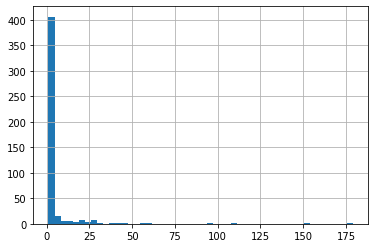

In [7]:
numero_vistas.hist(bins=50)

In [8]:
def obtener_tipo(programas):
    resultado = []
    for titulo in programas:
        
        l_split = titulo.split(':')
        if len(l_split) == 1 : 
            resultado.append('Pelicula')
        elif len(l_split) > 1 :
            resultado.append('Serie')
        else:
            resultado.append('')
    return resultado

df['Tipo']=obtener_tipo(df['Title'])


Serie       1759
Pelicula     276
Name: Tipo, dtype: int64


<AxesSubplot:>

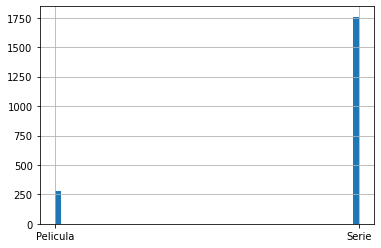

In [9]:
numero_tipo = df['Tipo'].value_counts()
print(numero_tipo)
df['Tipo'].hist(bins=50)

In [10]:
df_peliculas = df[df['Tipo']=='Pelicula']
print(len(df_peliculas['Title_1'].unique()))

df_peliculas

274


,Title,Date,Day,Title_1,Tipo
0,Kung Fu Panda 2,2020-08-12,Wednesday,Kung Fu Panda 2,Pelicula
1,La estrella de Belén,2020-07-12,Sunday,La estrella de Belén,Pelicula
3,La Nochebuena es mi condena,2020-06-12,Friday,La Nochebuena es mi condena,Pelicula
6,La lista perfecta de Navidad,2020-04-12,Sunday,La lista perfecta de Navidad,Pelicula
7,El teléfono,2020-04-12,Sunday,El teléfono,Pelicula
...,...,...,...,...,...
2010,Guardianes de la galaxia,2018-02-06,Tuesday,Guardianes de la galaxia,Pelicula
2021,Los Increíbles,2018-04-30,Monday,Los Increíbles,Pelicula
2027,Convicto,2018-04-14,Saturday,Convicto,Pelicula
2038,Aniquilación,2018-03-31,Saturday,Aniquilación,Pelicula


In [11]:
vistas_peliculas = df_peliculas['Title_1'].value_counts()

print(vistas_peliculas)

Shaft                      2
Perdida                    2
El gran truco              1
The Cloverfield Paradox    1
Robot 7723                 1
                          ..
30 minutos o menos         1
El juego de Gerald         1
Kung Fu Panda 2            1
Asesino del futuro         1
Perdidos en el espacio     1
Name: Title_1, Length: 274, dtype: int64


<AxesSubplot:>

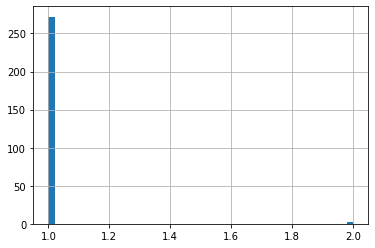

In [12]:
vistas_peliculas.hist(bins=50)

In [13]:
df_series = df[df['Tipo']=='Serie']
print(len(df_series['Title_1'].unique()))
df_series

196


,Title,Date,Day,Title_1,Tipo
2,Jingle Jangle: Una mágica Navidad,2020-06-12,Friday,Jingle Jangle,Serie
4,Creed II: Defendiendo el legado,2020-05-12,Tuesday,Creed II,Serie
5,Creed: Corazón de campeón,2020-05-12,Tuesday,Creed,Serie
8,Un príncipe de Navidad: Bebé real,2020-02-12,Wednesday,Un príncipe de Navidad,Serie
9,Gambito de dama: Miniserie: Aperturas,2020-11-30,Monday,Gambito de dama,Serie
...,...,...,...,...,...
2033,Star Trek: Discovery: Temporada 1: Escoja su d...,2018-03-31,Saturday,Star Trek,Serie
2034,Star Trek: Discovery: Temporada 1: El cuchillo...,2018-03-31,Saturday,Star Trek,Serie
2035,Star Trek: Discovery: Temporada 1: El contexto...,2018-03-31,Saturday,Star Trek,Serie
2036,Star Trek: Discovery: Temporada 1: Batalla en ...,2018-03-31,Saturday,Star Trek,Serie


In [14]:
vistas_series = df_series['Title_1'].value_counts()
print(vistas_series)

That '70s Show                          179
The Blacklist                           151
Community                               109
Brooklyn Nine-Nine                       96
Avatar                                   61
                                       ... 
Festival de la Canción de Eurovisión      1
Spenser                                   1
Las chicas del cable                      1
El Barco                                  1
Amityville                                1
Name: Title_1, Length: 196, dtype: int64


<AxesSubplot:>

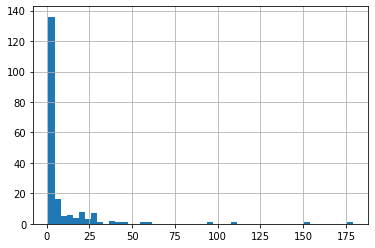

In [15]:
vistas_series.hist(bins=50)

<AxesSubplot:xlabel='Date'>

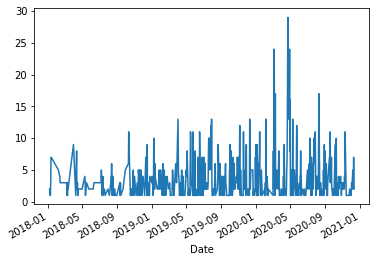

In [16]:
h = df.groupby("Date")['Title_1'].count()
#df.groupby(["state", "gender"])["last_name"].count()
h.plot()

<AxesSubplot:xlabel='Date'>

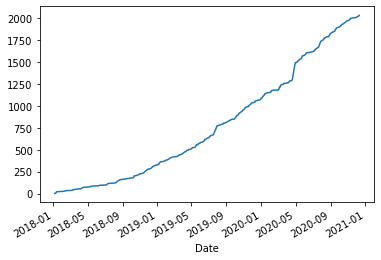

In [17]:
h = df.groupby("Date")['Title_1'].count().cumsum()
h.plot()

In [18]:
a = df.groupby(["Date","Tipo"])['Title_1']
a.describe()

count unique                           top freq
Date       Tipo                                                    
2018-01-06 Serie        2      1                         Merlí    2
2018-01-08 Pelicula     1      1             Papás con honores    1
2018-01-09 Pelicula     1      1                      Órbita 9    1
2018-01-10 Pelicula     3      3               Mente indomable    1
2018-01-11 Serie        7      2                         Merlí    6
...                   ...    ...                           ...  ...
2020-12-06 Pelicula     1      1                          Ride    1
           Serie        4      3  Las crónicas de Frankenstein    2
2020-12-08 Serie        2      1                Anne with an E    2
2020-12-09 Serie        7      2                     Cobra Kai    5
2020-12-10 Serie        2      2     La maldición de Bly Manor    1

[654 rows x 4 columns]

<AxesSubplot:xlabel='Date,Tipo'>

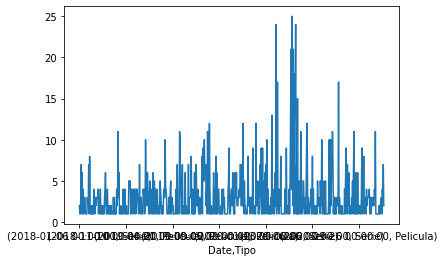

In [19]:
a = df.groupby(["Date","Tipo"])['Title_1'].count().sort_values(ascending=False)
a = df.groupby(["Date","Tipo"])['Title_1'].count()
a.plot()

<AxesSubplot:xlabel='Day'>

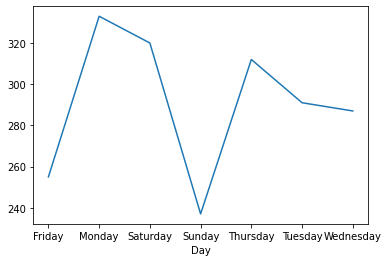

In [20]:
a = df.groupby(["Day"])['Title_1'].count()
a.plot()

In [21]:
# Obtener información de películas. 

In [22]:
movie = 'Babadook'
url = 'https://api.themoviedb.org/3/search/movie?api_key=3c35ea3e9d8c1a6d96d7dd37f74a52b0&page=1&query='+movie
r = requests.get(url=url)
json = r.json()
print("Tipo:  \n",type(json),"\nLlaves:\n", json.keys(),"\nResultados: \n", json['total_results'])
print(json['results'][0].keys())



Tipo:  
 <class 'dict'> 
Llaves:
 dict_keys(['page', 'results', 'total_pages', 'total_results']) 
Resultados: 
 2
dict_keys(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'release_date', 'title', 'video', 'vote_average', 'vote_count'])


# Obtener información de los generos

In [23]:
#https://developers.themoviedb.org/3/genres/get-movie-list
url = 'https://api.themoviedb.org/3/genre/movie/list?api_key=3c35ea3e9d8c1a6d96d7dd37f74a52b0&language=en-US'
r = requests.get(url=url)
json = r.json()
print(json)
l_gen = json['genres']
dict_g = {}
j = 0 
for g in l_gen:
    key = g['id']
    dict_g[key]= j
    j = j +1 
    
print(dict_g)

{'genres': [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}, {'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id': 36, 'name': 'History'}, {'id': 27, 'name': 'Horror'}, {'id': 10402, 'name': 'Music'}, {'id': 9648, 'name': 'Mystery'}, {'id': 10749, 'name': 'Romance'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 10770, 'name': 'TV Movie'}, {'id': 53, 'name': 'Thriller'}, {'id': 10752, 'name': 'War'}, {'id': 37, 'name': 'Western'}]}
{28: 0, 12: 1, 16: 2, 35: 3, 80: 4, 99: 5, 18: 6, 10751: 7, 14: 8, 36: 9, 27: 10, 10402: 11, 9648: 12, 10749: 13, 878: 14, 10770: 15, 53: 16, 10752: 17, 37: 18}


In [24]:
def obtener_diccionario(movie, generos):
    diccionario={}
    #diccionario['pelicula'] = movie
    for g in generos :
        diccionario[g]= 1
    return diccionario


# Dataframe peliculas

In [25]:
dict_m = {}
# obtener lista de las peliculas del dataframe

lista_m = df_peliculas['Title_1']
df_moviedb = pd.DataFrame( )
# i Peliculas con solo un registro
i = 0
# j peliculas con mas de un registro
j = 0 
# Peliculas sin registro 
k = 0 
for movie in lista_m:
    url = 'https://api.themoviedb.org/3/search/movie?api_key=3c35ea3e9d8c1a6d96d7dd37f74a52b0&page=1&query='+movie
    r = requests.get(url=url)
    json = r.json()
    # si solo hay un registro: 
    if len ( json['results'] ) == 1 :
        
        lista_generos = json['results'][0]['genre_ids']
        generos = obtener_diccionario(movie, lista_generos)
        #generos = json['results'][0]
        df_moviedb = df_moviedb.append(generos,ignore_index=True)
       
        i = i +1
    elif json["total_results"] > 1:
        print("Pelicula con mas de un registro "+movie)
        j = j +1
    else:
        print("Pelicula no encontrada "+movie)
        k = k +1
         
print( i,":",j,":",k )

Pelicula con mas de un registro Kung Fu Panda 2
Pelicula con mas de un registro La estrella de Belén
Pelicula no encontrada La lista perfecta de Navidad
Pelicula con mas de un registro El teléfono
Pelicula con mas de un registro Un príncipe de Navidad
Pelicula con mas de un registro Flechazo a primera vista
Pelicula con mas de un registro Intercambio de princesas 2
Pelicula no encontrada Una Navidad en Alaska
Pelicula no encontrada El secreto de Navidad
Pelicula no encontrada Una Navidad a la medida
Pelicula con mas de un registro Escuadrón 6
Pelicula con mas de un registro Kung Fu Panda
Pelicula con mas de un registro No respires
Pelicula con mas de un registro La leyenda del jinete sin cabeza
Pelicula con mas de un registro Spectral
Pelicula con mas de un registro Control total
Pelicula con mas de un registro Wolf Warrior
Pelicula con mas de un registro Cars 2
Pelicula con mas de un registro El stand de los besos
Pelicula con mas de un registro Los caballeros
Pelicula con mas de un r

In [26]:
df_moviedb

,35,10751,10749,14,27,9648,18,80,37,53,28,878,16,36,12,10770,99,10752,10402
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
137,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_moviedb= df_moviedb.fillna(0)
df_moviedb

,35,10751,10749,14,27,9648,18,80,37,53,28,878,16,36,12,10770,99,10752,10402
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_moviedb.describe()

,35,10751,10749,14,27,9648,18,80,37,53,28,878,16,36,12,10770,99,10752,10402
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.446043,0.071942,0.309353,0.115108,0.028777,0.107914,0.446043,0.165468,0.007194,0.258993,0.187050,0.115108,0.028777,0.035971,0.107914,0.014388,0.007194,0.014388,0.007194
std,0.498878,0.259327,0.463898,0.320306,0.167784,0.311393,0.498878,0.372946,0.084819,0.439666,0.391362,0.320306,0.167784,0.186892,0.311393,0.119517,0.084819,0.119517,0.084819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

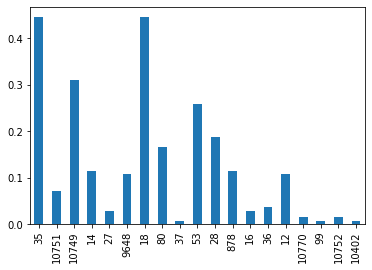

In [29]:
promedio = df_moviedb.sum()/139
promedio.plot.bar()

In [30]:
df_moviedb

,35,10751,10749,14,27,9648,18,80,37,53,28,878,16,36,12,10770,99,10752,10402
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


139
327680


(array([44.,  7.,  1.,  3.,  5.,  0.,  0., 11.,  1.,  0.,  0.,  1.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0., 20.,  7.,  0.,  0.,  1.,  0.,  1., 15.,  9.,  0.,  0.,
         3.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([4.0000000e+00, 9.1789600e+03, 1.8353920e+04, 2.7528880e+04,
        3.6703840e+04, 4.5878800e+04, 5.5053760e+04, 6.4228720e+04,
        7.3403680e+04, 8.2578640e+04, 9.1753600e+04, 1.0092856e+05,
        1.1010352e+05, 1.1927848e+05, 1.2845344e+05, 1.3762840e+05,
        1.4680336e+05, 1.5597832e+05, 1.6515328e+05, 1.7432824e+05,
        1.8350320e+05, 1.9267816e+05, 2.0185312e+05, 2.1102808e+05,
        2.2020304e+05, 2.2937800e+05, 2.3855296e+05, 2.4772792e+05,
        2.5690288e+05, 2.6607784e+05, 2.7525280e+05, 2.8442776e+05,
        2.9360272e+05, 3.0277768e+05, 3.1195264e+05, 3.2112760e+05,
        3.3030256e+05, 3.3947752e+05, 3.4865248e+05, 3.5782744e+05,
        3.6700240e+05, 3.7617736e+05

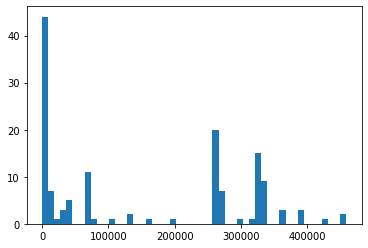

In [31]:
hist = []
list_a = []
df_moviedb_hist = pd.DataFrame()


for i in range(139):
    vector = df_moviedb.iloc[i]
    bit = BitArray(vector)
    ent = bit.uint
    #print(ent)
    hist.append(int(ent))
    df_moviedb_hist= df_moviedb_hist.append(pd.Series(vector, index=df_moviedb.columns ), ignore_index=True)
h = np.histogram(hist)
print(len(hist))
print(stat.mode(hist))
plt.hist(hist, bins=50)


In [32]:
df_moviedb_hist

,12,14,16,18,27,28,35,36,37,53,80,99,878,9648,10402,10749,10751,10752,10770
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def distancia(pelicula_1, pelicula_2):
    unos_i = 0
    unos_d = 0
    d = 0
    for i in pelicula_1.index :
        if pelicula_1[i]+pelicula_2[i] == 2:
            unos_i = unos_i +1
        elif pelicula_1[i]+pelicula_2[i] == 1:
            unos_d = unos_d +1
    if unos_i + unos_d == 0:
        d = 1
    else :
        d = unos_d/( unos_i + unos_d)
    return d

pelicula_1 = df_moviedb.iloc[0]
pelicula_2 = df_moviedb.iloc[1]

d = distancia(pelicula_1, pelicula_2)
print(d)

0.6666666666666666


In [34]:
def centroide(clase):
    #centroide  = pd.Series([0]*19)
    llave_pelicula = clase[0]
    centroide = df_moviedb.iloc[llave_pelicula]
    for llave_pelicula in clase[1:]:
        pelicula = df_moviedb.iloc[llave_pelicula]
        centroide = centroide + pelicula
    centroide = centroide/ len(clase)
    print(centroide)
clase = [0,1]
c = centroide(clase)

35       1.0
10751    0.5
10749    0.5
14       0.0
27       0.0
9648     0.0
18       0.0
80       0.0
37       0.0
53       0.0
28       0.0
878      0.0
16       0.0
36       0.0
12       0.0
10770    0.0
99       0.0
10752    0.0
10402    0.0
dtype: float64


In [35]:
def clasificador(df):
    for i in range(len(df_grafo)):
        vector = df.iloc[i]

In [36]:
def k_means(df):
    k = 3
    k_mean = [[]]*k
    s = random.sample(range(len(df)),k=k)
    print(s)
    return k_mean
print(k_means(df_moviedb))

[5, 65, 17]
[[], [], []]


In [72]:
k = 0 

df_grafo = df_moviedb
#df_grafo = df_moviedb_hist
G=nx.Graph()
# agregar lista de nodos [0,1,2,...138]
G.add_nodes_from(range(len(df_grafo)))

for i in range( len(df_grafo) ):
    for j in range(i+1,len(df_grafo)):
        #print("i",i, "j", j )
        vector_i = df_grafo.iloc[i]
        vector_j = df_grafo.iloc[j]
        d = distancia( vector_i , vector_j )
        if d == 1:
            pass 
        elif d < 0.5 : 
            #print( i , "->" , j )
            G.add_edge(i,j)
            k = k + 1

           
print(k)

821


In [70]:
2/19

0.10526315789473684

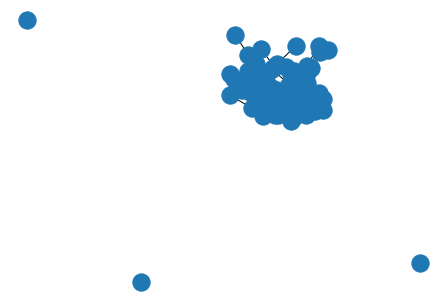

In [71]:
nx.draw(G)

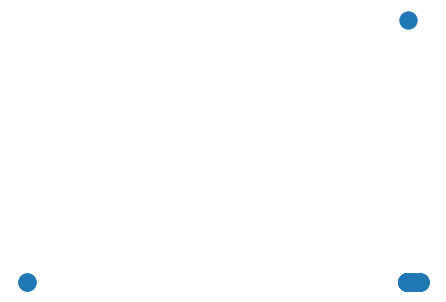

In [52]:
nx.draw_spectral(G)

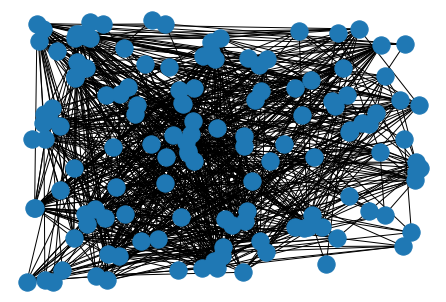

In [60]:
pos=nx.random_layout(G)
pos=nx.kamada_kawai_layout(G)
pos = nx.spiral_layout(G)
pos = nx.spring_layout(G)
pos = nx.shell_layout(G)
pos = nx.circular_layout(G)

pos=nx.random_layout(G)

nx.draw(G,pos)

In [61]:
num_clases = nx.number_connected_components(G)
num_clases

16

In [62]:
sub_g = [G.subgraph(c).copy() for c in nx.connected_components(G)]
i = 0
for s in sub_g :
    plt.figure(1)
    nx.draw(s,pos)
    plt.savefig(str(i)+'.png')
    plt.clf()
    i = i + 1

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

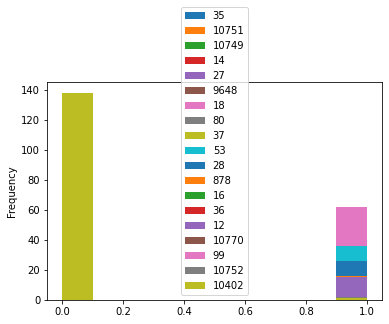

In [43]:
df_moviedb.plot.hist()

In [44]:
def get_vector(generos):
    vector = [0]*19
    for g in generos :
        indice = dict_g[g]
        vector[indice]= 1
    return vector

dict_m = {}
dict_pelicula = {}
lista_m = df_peliculas['Title_1']
set_generos = set()
for movie in lista_m:
    url = 'https://api.themoviedb.org/3/search/movie?api_key=3c35ea3e9d8c1a6d96d7dd37f74a52b0&page=1&query='+movie
    r = requests.get(url=url)
    json = r.json()
    if len ( json['results'] ) > 0 :
        for res in json['results'] :
            v_generos = get_vector(res['genre_ids'])
            dict_pelicula[movie] = v_generos
            
            

print( dict_pelicula )

{'Kung Fu Panda 2': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'La estrella de Belén': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'La Nochebuena es mi condena': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'El teléfono': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'El caballero de la Navidad': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'Un príncipe de Navidad': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'Flechazo a primera vista': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'Intercambio de princesas 2': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'Operación Feliz Navidad': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'Escuadrón 6': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'Amor de calendario': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'El Halloween de Hubie': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],

In [45]:
print( (set_generos) )

set()
